<a href="https://colab.research.google.com/github/ahmadharimukti/contohbaru/blob/main/LSTM_For_Tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [ ]:
tweets = pd.read_csv('drive/My Drive/Colab Notebooks/data/Twitter Spam/trainkedua.csv')
tweets.head()

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",1,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",0,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,1,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,1,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",1,NaN


In [ ]:
twitter = tweets.drop(['following','followers','actions','is_retweet','location','Unnamed: 7'],axis=1)

In [ ]:
twitter.head()

,Tweet,Type
0,Good Morning Love @LeeBrown_V,1
1,'@realDonaldTrump @USNavy RIP TO HEROES',0
2,Haven't been following the news but I understa...,1
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,1
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,1


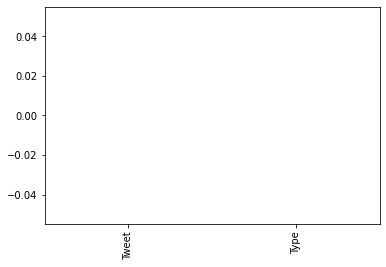

In [ ]:
twitter.isnull().sum().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Samples')

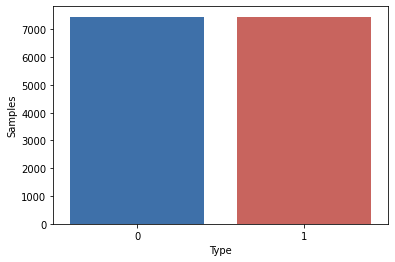

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color = [sns.xkcd_rgb['medium blue'], sns.xkcd_rgb['pale red']]
sns.countplot('Type',data = twitter, palette = color)
plt.gca().set_ylabel('Samples')

In [ ]:
twitter.head()

,Tweet,Type
0,Good Morning Love @LeeBrown_V,1
1,'@realDonaldTrump @USNavy RIP TO HEROES',0
2,Haven't been following the news but I understa...,1
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,1
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,1


# Eksplor data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

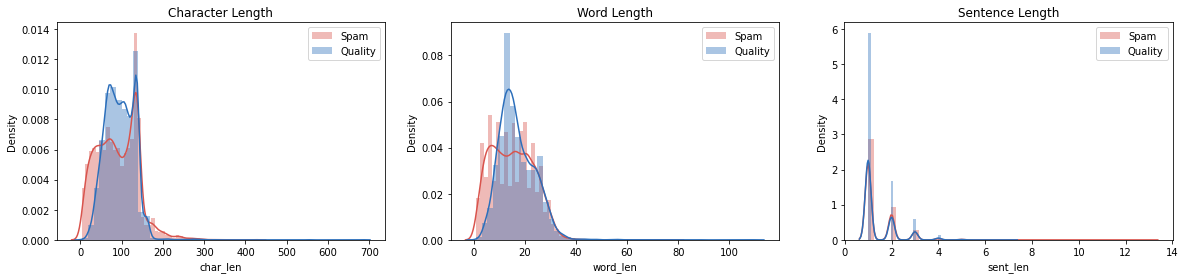

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# count number of characters in each tweet
twitter['char_len'] = twitter.Tweet.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(tweet)) for tweet in twitter.Tweet]
twitter['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(tweet)) for tweet in twitter.Tweet]
twitter['sent_len'] = sent_tokens

plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(twitter[twitter.Type == 1][plot_cols[i]], label='Spam', color=color[1]).set_title(plot_titles[i])
    sns.distplot(twitter[twitter.Type == 0][plot_cols[i]], label='Quality', color=color[0])
    plt.legend()

In [ ]:
twitter.head()

,Tweet,Type,char_len,word_len,sent_len
0,Good Morning Love @LeeBrown_V,1,30,5,1
1,'@realDonaldTrump @USNavy RIP TO HEROES',0,40,9,1
2,Haven't been following the news but I understa...,1,82,16,1
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,1,149,17,1
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,1,108,22,1


In [ ]:
# Investigate the Outliers

twitter[twitter.sent_len > 8]
twitter[twitter.word_len > 50]

,Tweet,Type,char_len,word_len,sent_len
1533,'@fyahlite @nyafromfire @MzNatTurner @Fresh_Fl...,0,552,88,2
1646,ONLINE DEALS : http://www.sherif.ws/main2.php?...,1,424,75,1
3362,ONLINE DEALS : http://www.sherif.ws/main2.php?...,1,424,78,1
4766,"Chips, a hero US Army dog who ran nose-first i...",0,301,61,3
5678,'@CNNPolitics @CNN @CNNI @CNNPolitics @CNNSitR...,0,295,66,7
5803,'@JulianSvendsen @klralms @realDonaldTrump PRE...,0,324,58,3
7195,'@DailyCaller Lets get rid of all current poli...,0,292,56,5
7479,'@Hakimyasin @ThisGuysTaint @gazafreee @Palest...,0,684,110,1
7898,via @IHSforHaiti YOU ARE HIGHLY BLESSED AND FA...,1,135,57,4
9035,"CNN: ""First lady Melania Trump's plane arrive...",0,274,56,1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text(0.5, 1.0, 'Top Stopwords for  Quality Tweet')

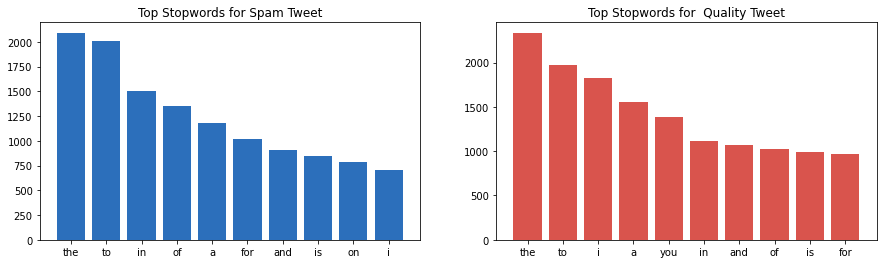

In [ ]:
## Plot most common stopwords

nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Get all the word tokens in dataframe for Quality and Spam
corpus0 = [] # Spam
[corpus0.append(word.lower()) for tweet in twitter[twitter.Type == 0].Tweet for word in word_tokenize(tweet)]
corpus1 = [] # Quality
[corpus1.append(word.lower()) for tweet in twitter[twitter.Type == 1].Tweet for word in word_tokenize(tweet)]

# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop: 
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

x0,y0 = count_top_stopwords(corpus0)
x1,y1 = count_top_stopwords(corpus1)

# Plot bar plot of top stopwords for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Stopwords for Spam Tweet')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Stopwords for  Quality Tweet')

Text(0.5, 1.0, 'Top Punctuations for Quality Tweets')

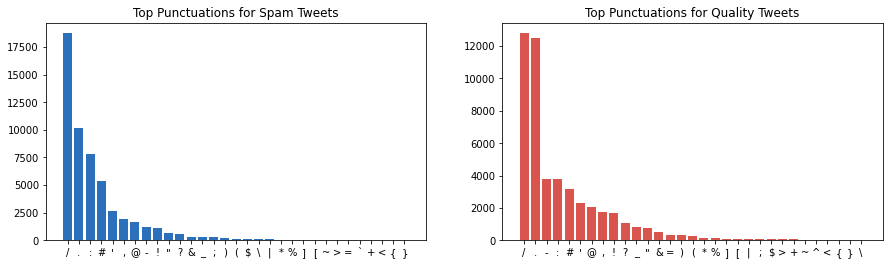

In [ ]:
## Plot most common punctuations

from string import punctuation

# Get all the punctuations in dataframe for Quality and Spam
corpus0 = [] # Spam
[corpus0.append(c) for tweet in twitter[twitter.Type == 0].Tweet for c in tweet]
corpus0 = list(filter(lambda x: x in punctuation, corpus0)) # use filter to select only punctuations
corpus1 = [] # Quality
[corpus1.append(c) for tweet in twitter[twitter.Type == 1].Tweet for c in tweet]
corpus1 = list(filter(lambda x: x in punctuation, corpus1)) 

from collections import Counter
x0,y0 = zip(*Counter(corpus0).most_common())
x1,y1 = zip(*Counter(corpus1).most_common())

# Plot bar plot of top punctuations for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Punctuations for Spam Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Punctuations for Quality Tweets')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

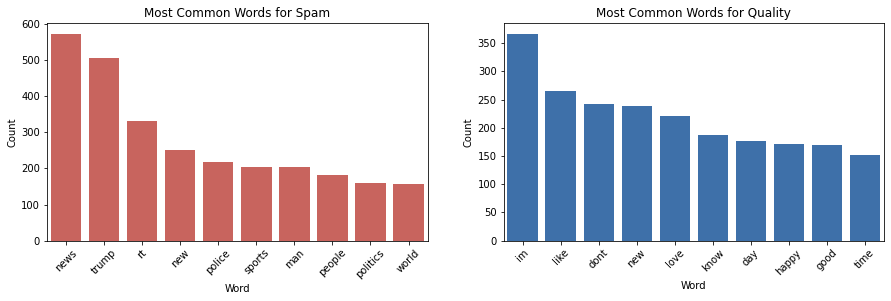

In [ ]:
## Plot most common words
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources

# function for removing url from text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# - remove url, tokenize tweet into words, lowercase words
corpus0 = [] # Spam
[corpus0.append(word.lower()) for tweet in twitter[twitter.Type == 0].Tweet for word in word_tokenize(remove_url(tweet))]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords

corpus1 = [] # Quality
[corpus1.append(word.lower()) for tweet in twitter[twitter.Type == 1].Tweet for word in word_tokenize(remove_url(tweet))]
corpus1 = list(filter(lambda x: x not in stop, corpus1)) # use filter to unselect stopwords

# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Word','Count'])

a = Counter(corpus1).most_common()
df1 = pd.DataFrame(a, columns=['Word','Count'])

# Plot for Quality and Spam
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Word',y='Count',data=df0.head(10), color=color[1]).set_title('Most Common Words for Spam')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='Word',y='Count',data=df1.head(10), color=color[0]).set_title('Most Common Words for Quality')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Quality')

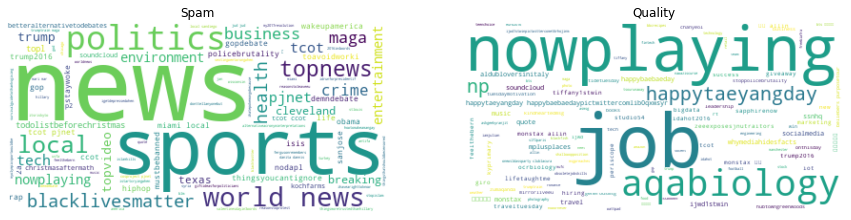

In [ ]:
def clean(word):
    for p in punctuation: word = word.replace(p, '')
    return word

from wordcloud import WordCloud

def wc_hash(target):
    hashtag = [clean(w[1:].lower()) for tweet in twitter[twitter.Type == target].Tweet for w in tweet.split() if '#' in w and w[0] == '#']
    hashtag = ' '.join(hashtag)
    my_cloud = WordCloud(background_color='white', stopwords=stop).generate(hashtag)

    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

plt.figure(figsize=(15,4))
wc_hash(0)
plt.title('Spam')
wc_hash(1)
plt.title('Quality')

# Meta-Feature Engineering

In [ ]:
from textblob import TextBlob

# polarity and subjectivity
twitter['polarity'] = [TextBlob(tweet).sentiment.polarity for tweet in twitter.Tweet]
twitter['subjectivity'] = [TextBlob(tweet).sentiment.subjectivity for tweet in twitter.Tweet]

#############################################################################################################################
# exclaimation and question marks
twitter['exclaimation_num'] = [tweet.count('!') for tweet in twitter.Tweet]
twitter['questionmark_num'] = [tweet.count('?') for tweet in twitter.Tweet]

#############################################################################################################################
# count number of hashtags and mentions
# Function for counting number of hashtags and mentions
def count_url_hashtag_mention(text):
    urls_num = len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    word_tokens = text.split()
    hash_num = len([word for word in word_tokens if word[0] == '#' and word.count('#') == 1]) # only appears once in front of word 
    mention_num = len([word for word in word_tokens if word[0] == '@' and word.count('@') == 1]) # only appears once in front of word 
    return urls_num, hash_num, mention_num

url_num, hash_num, mention_num = zip(*[count_url_hashtag_mention(tweet) for tweet in twitter.Tweet])
twitter = twitter.assign(url_num = url_num, hash_num = hash_num, mention_num = mention_num)

#############################################################################################################################
# count number of contractions
contractions = ["'t", "'re", "'s", "'d", "'ll", "'ve", "'m"]
twitter['contraction_num'] = [sum([tweet.count(cont) for cont in contractions]) for tweet in twitter.Tweet]

In [ ]:
twitter.head()

,Tweet,Type,char_len,word_len,sent_len,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,Good Morning Love @LeeBrown_V,1,30,5,1,0.6,0.600000,0,0,0,0,1,0
1,'@realDonaldTrump @USNavy RIP TO HEROES',0,40,9,1,0.0,0.000000,0,0,0,0,1,0
2,Haven't been following the news but I understa...,1,82,16,1,0.0,0.100000,0,0,0,1,0,1
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,1,149,17,1,0.0,0.000000,0,0,1,2,0,0
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,1,108,22,1,0.0,0.333333,0,0,0,2,0,0


## Preprocessing

In [ ]:

# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

twitter.text = [decontraction(tweet) for tweet in twitter.Tweet]

#############################################################################################################################
## Remove Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("OMG there is a volcano eruption!!! 😭😱😷"))
twitter.text = twitter.Tweet.apply(lambda x: remove_emoji(x))

OMG there is a volcano eruption!!! 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [ ]:
#############################################################################################################################
## Remove URLs
twitter.text = twitter.Tweet.apply(lambda x: remove_url(x))

#############################################################################################################################
## Remove Punctuations except '!?'

def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

twitter.text = twitter.Tweet.apply(lambda x: remove_punct(x))

#############################################################################################################################
## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

twitter.text = twitter.Tweet.apply(lambda x: replace_amp(x))

#############################################################################################################################

In [ ]:
pip install wordsegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 40.8 MB/s 


In [ ]:
from wordsegment import load, segment
load()

twitter.Tweet = twitter.Tweet.apply(lambda x: ' '.join(segment(x)))

In [ ]:
## Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemma(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w.lower(), pos='v') for w in words])

twitter.Tweet = twitter.Tweet.apply(lambda x: lemma(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
## Ngrams
from nltk.util import ngrams

def generate_ngrams(text, n):
    words = word_tokenize(text)
    return [' '.join(ngram) for ngram in list(get_data(ngrams(words, n))) if not all(w in stop for w in ngram)] # exclude if all are stopwords


# in newer versions of python, raising StopIteration exception to end a generator, which is used in ngram, is deprecated
def get_data(gen):
    try:
        for elem in gen:
            yield elem
    except (RuntimeError, StopIteration):
        return


In [ ]:
# Bigrams

bigrams_disaster = twitter[twitter.Type==1].Tweet.apply(lambda x: generate_ngrams(x, 2))
bigrams_ndisaster = twitter[twitter.Type==0].Tweet.apply(lambda x: generate_ngrams(x, 2))

bigrams_d_dict = {}
for bgs in bigrams_disaster:
    for bg in bgs:
        if bg in bigrams_d_dict:
            bigrams_d_dict[bg] += 1
        else:
            bigrams_d_dict[bg] = 1

bigrams_d_df = pd.DataFrame(bigrams_d_dict.items(), columns=['Bigrams','Count'])

bigrams_nd_dict = {}
for bgs in bigrams_ndisaster:
    for bg in bgs:
        if bg in bigrams_nd_dict:
            bigrams_nd_dict[bg] += 1
        else:
            bigrams_nd_dict[bg] = 1            

bigrams_nd_df = pd.DataFrame(bigrams_nd_dict.items(), columns=['Bigrams','Count'])


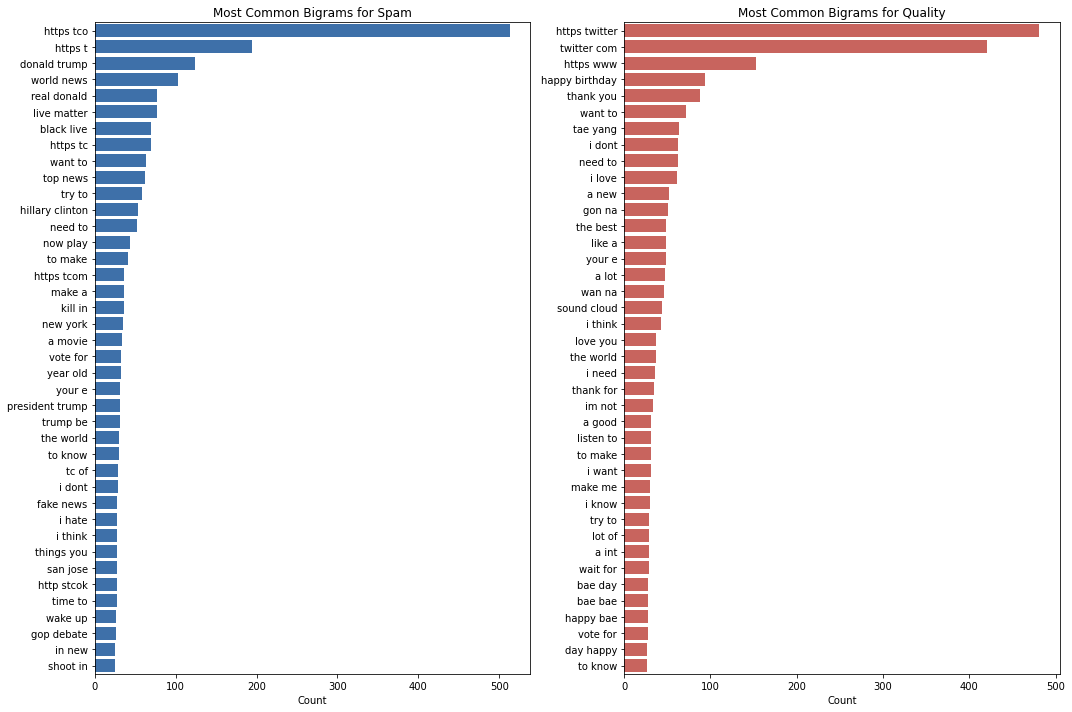

In [ ]:
# Barplots for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Bigrams',data=bigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Bigrams for Spam')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Bigrams',data=bigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Bigrams for Quality')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

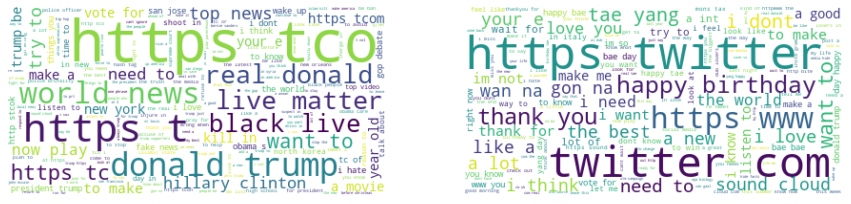

In [ ]:

# Woudcloud for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_nd_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1,2,2)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_d_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [ ]:

# Trigrams

trigrams_disaster = twitter[twitter.Type==1].Tweet.apply(lambda x: generate_ngrams(x, 3))
trigrams_ndisaster = twitter[twitter.Type==0].Tweet.apply(lambda x: generate_ngrams(x, 3))

trigrams_d_dict = {}
for tgs in trigrams_disaster:
    for tg in tgs:
        if tg in trigrams_d_dict:
            trigrams_d_dict[tg] += 1
        else:
            trigrams_d_dict[tg] = 1

trigrams_d_df = pd.DataFrame(trigrams_d_dict.items(), columns=['Trigrams','Count'])

trigrams_nd_dict = {}
for tgs in trigrams_ndisaster:
    for tg in tgs:
        if tg in trigrams_nd_dict:
            trigrams_nd_dict[tg] += 1
        else:
            trigrams_nd_dict[tg] = 1            

trigrams_nd_df = pd.DataFrame(trigrams_nd_dict.items(), columns=['Trigrams','Count'])

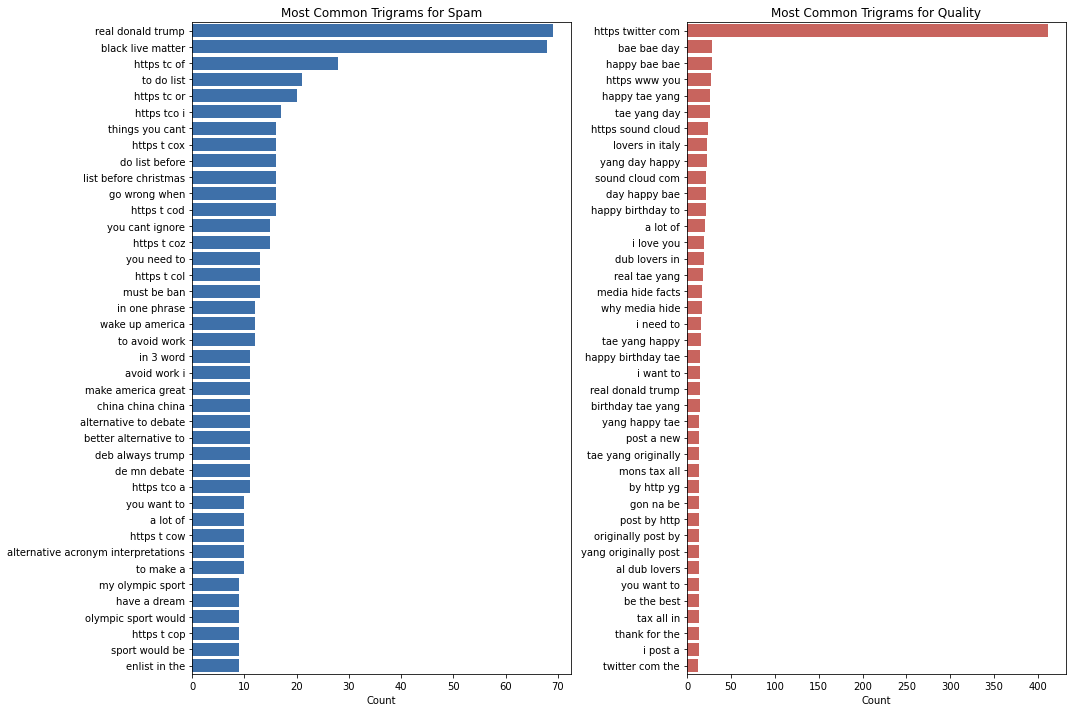

In [ ]:
# Barplots for trigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Trigrams',data=trigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Trigrams for Spam')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Trigrams',data=trigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Trigrams for Quality')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
## Remove Stopwords
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    return ' '.join([w.lower() for w in word_tokens if not w.lower() in stop])

#tweets_tmp = tweets.copy()
twitter['text_nostopwords'] = twitter.Tweet.apply(lambda x: remove_stopwords(x))

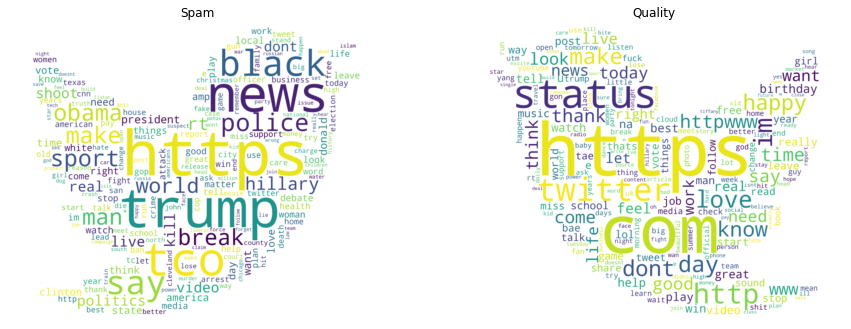

In [ ]:
## Plot word cloud for most common words after cleaning

from PIL import Image
mask = np.array(Image.open('drive/My Drive/Colab Notebooks/data/Twitter Spam/Pictures/Twitter-Logo.png'))
reverse = mask[...,::-1,:]

def wc_words(target, mask=mask):
    words = [word.lower() for tweet in twitter[twitter.Type == target].text_nostopwords for word in tweet.split()]
    words = list(filter(lambda w: w != 'like', words))
    words = list(filter(lambda w: w != 'new', words))
    words = list(filter(lambda w: w != 'people', words))
    dict = {}
    for w in words:
        if w in dict:
            dict[w] += 1
        else:
            dict[w] = 1
    # plot using frequencies        
    my_cloud = WordCloud(background_color='white', stopwords=stop, mask=mask, random_state=0).generate_from_frequencies(dict) 
    
    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

plt.figure(figsize=(15,10))
wc_words(0)
plt.title('Spam')
wc_words(1, reverse)
plt.title('Quality')
plt.show()


In [ ]:
pd.options.display.max_colwidth = 200
for t in twitter['Tweet'].sample(n=20, random_state=0):
    print(t)
pd.reset_option('max_colwidth')


city and guilds congratulations to all the fantastic medals for excellence winners north lancs pictwittercomjk1kvng2ia
360wise news can south korean startups and the government save its flail giant tech conglomerate httpdldbze7gd6
americans refuse to accept donald trump as president protest erupt across america httpstco5bv7hn0wxm
cutest little gem pictwittercomaj8wyrb3bq
reason to leave eu expensive bitch
kodak why u act like dat why us trap like at pictwittercomlhblcuwg6y
pauline charles harris be a great one dimensional pass rusher https t cos rwq5nrwzmhttpstco90v8ae4 ngh
rt americanvoter us cnn producer call us stupid as shit hillary clinton call us just plain stupid real donalhttpstco6rhi2fthdd
when people judge and criticize you just remember it say nothing about you and everything about them
china stock retreat despite new move to stave off crash business
you know you out stay your age limit when httpfbme4cduymncw
you know japan pictwittercomf0onb6tzz5
archive hedge bz even laura

In [ ]:
pd.reset_option('max_colwidth')
twitter.drop('text_nostopwords', axis=1, inplace=True)
twitter.head()


,Tweet,Type,char_len,word_len,sent_len,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,good morning love lee brown v,1,30,5,1,0.6,0.600000,0,0,0,0,1,0
1,real donald trump us navy rip to heroes,0,40,9,1,0.0,0.000000,0,0,0,0,1,0
2,havent be follow the news but i understand eff...,1,82,16,1,0.0,0.100000,0,0,0,1,0,1
3,pictwittercomdy9q4ftlhz what to do with paper ...,1,149,17,1,0.0,0.000000,0,0,1,2,0,0
4,do you know mahatma gandhi make a brief visit ...,1,108,22,1,0.0,0.333333,0,0,0,2,0,0


# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(twitter.drop(['Type'],axis=1), 
                                                  twitter[['Type']], 
                                                  test_size=0.3, 
                                                  stratify=twitter[['Type']], 
                                                  random_state=0)
X_train_text = X_train['Tweet']
X_val_text = X_val['Tweet']

print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)



X_train shape:  (10429, 12)
X_val shape:  (4470, 12)
y_train shape:  (10429, 1)
y_val shape:  (4470, 1)


In [ ]:
print("X_train :",len(X_train))
print("X_val :",len(X_val))

X_train : 10429
X_val : 4470


In [ ]:
print('Train Class Proportion:\n', y_train['Type'].value_counts() / len(y_train) * 100)
print('\nValidation Class Proportion:\n', y_val['Type'].value_counts() / len(y_val) * 100)

Train Class Proportion:
 1    50.03356
0    49.96644
Name: Type, dtype: float64

Validation Class Proportion:
 1    50.044743
0    49.955257
Name: Type, dtype: float64


# Embedding 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer_1 = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer_1.fit_on_texts(X_train_text)

In [ ]:
X_train_text = tokenizer_1.texts_to_sequences(X_train_text)
X_val_text = tokenizer_1.texts_to_sequences(X_val_text)
print(X_train_text[:10])
print('')
print(X_val_text[:10])

[[2510, 1819, 7, 19, 273, 3358, 964, 15, 1, 1, 4, 1660, 1265, 717, 2023, 1661, 1, 80, 911, 1], [23, 2024, 1, 806, 1, 544, 565, 1662, 37, 1, 1, 1], [140, 14, 48, 2, 4062, 3359, 2, 1429, 3, 873, 36, 74, 1], [496, 1266, 3360, 1663, 1266, 1266, 663, 3361, 1], [9, 228, 2219, 35, 149, 21, 48, 15], [2, 1, 4063, 1430, 13, 2863, 842, 1267, 1, 36, 2025, 13, 2864, 2863, 58, 2026, 50, 2511, 23, 434, 2, 1, 4063, 1430, 13, 2863, 842, 1267, 1, 55, 2512, 42, 2026, 1], [2220, 3362, 1], [34, 874], [2027, 1, 2221, 398, 1, 224, 63, 73, 16, 327, 2513, 71, 1, 16, 129, 1007, 1, 1], [9, 420, 87, 843, 105]]

[[34, 740, 9, 63, 178, 73, 52, 4, 405, 1, 1322, 1347, 2614, 57, 1, 2987, 12, 30, 25, 1, 2987, 31, 1], [14, 21, 262, 82, 329, 109, 77, 3, 65, 297, 5, 658, 548, 2, 306, 1992, 2, 2228], [42, 5, 260, 15, 1, 28, 66, 3258, 3, 32, 99, 2, 360, 65, 88, 5, 2581, 1, 14, 185, 73, 4863, 39, 88, 1], [238, 1, 447, 242, 445, 436, 2147, 649, 10, 1, 445, 436, 4, 238, 1, 206, 1], [91, 8, 130, 28, 73], [9, 63, 168, 73, 11, 45

In [ ]:
tokenizer_1.sequences_to_texts([X_train_text[1]])

['news terrorism <UNK> un <UNK> isis under pressure new <UNK> <UNK> <UNK>']

In [ ]:
print('Train Set Max Length:', max(len(text) for text in X_train_text))
maxlen = 50

X_train_text = pad_sequences(X_train_text, padding='post', maxlen=maxlen)
X_val_text = pad_sequences(X_val_text, padding='post', maxlen=maxlen)

print('X_train shape:', X_train_text.shape)
print('X_train shape:', X_val_text.shape)

Train Set Max Length: 72
X_train shape: (10429, 50)
X_train shape: (4470, 50)


In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer_1.word_index) + 1

# load the whole embedding into memory
embeddings_index = dict()
f = open('drive/My Drive/Colab Notebooks/data/Twitter Spam/glove.twitter.27B.200d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1193515 word vectors.


In [ ]:
# create a weight matrix for words in training set
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer_1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print('Embedding Matrix Shape:', embedding_matrix.shape)

Embedding Matrix Shape: (24706, 200)


# Model Building dan Training

# 1. LSTM

In [ ]:
## Hyperparameters
num_epochs=30
dropout=0.2
recurrent_dropout=0.2
lr=0.0005
batch_size=128
class_weight = {0: y_train['Type'].value_counts()[1]/len(y_train), 
                1: y_train['Type'].value_counts()[0]/len(y_train)} 

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, LSTM
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.callbacks import ModelCheckpoint

lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen, trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128, return_sequences=True, dropout=dropout, recurrent_dropout=recurrent_dropout)) # try adding dropout later
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(lr=lr)
lstm_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 200)           4941200   
                                                                 
 lstm (LSTM)                 (None, 50, 128)           168448    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 5,241,361
Trainable params: 300,161
Non-trainable params: 4,941,200
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def plot_model_performance(history):   
    plt.figure(figsize=(15,5))
    plt.plot(range(num_epochs), history.history['acc'],'-o',
             label='Train ACC',color='#ff7f0e')
    plt.plot(range(num_epochs),history.history['val_acc'],'-o',
             label='Val ACC',color='#1f77b4')
    x = np.argmax( history.history['val_acc'] ); y = np.max( history.history['val_acc'] )
    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#1f77b4')
    plt.text(x-0.03*xdist,y-0.13*ydist,'max acc\n%.2f'%y,size=14)
    plt.ylabel('Accuracy',size=14); plt.xlabel('Epoch',size=14)
    plt.legend(loc=(0.01,0.75))

    plt2 = plt.gca().twinx()
    plt2.plot(range(num_epochs),history.history['loss'],'-o',
              label='Train Loss',color='#2ca02c')
    plt2.plot(range(num_epochs),history.history['val_loss'],'-o',
              label='Val Loss',color='#d62728')
    x = np.argmin( history.history['val_loss'] ); y = np.min( history.history['val_loss'] )
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#d62728')
    plt.text(x-0.03*xdist,y+0.05*ydist,'min loss',size=14)
   # plt.ylim([-0.2, 2])
    plt.ylabel('Loss',size=14)
    plt.xticks(ticks=list(range(num_epochs)),labels=list(range(1, num_epochs+1)))
    plt.legend(loc='lower left', bbox_to_anchor=(0.01, 0.1))
    plt.show()



Epoch 1/30
82/82 [==============================] - 35s 376ms/step - loss: 0.2847 - acc: 0.7027 - val_loss: 0.5257 - val_acc: 0.7485
Epoch 2/30
82/82 [==============================] - 30s 364ms/step - loss: 0.2423 - acc: 0.7685 - val_loss: 0.4740 - val_acc: 0.7758
Epoch 3/30
82/82 [==============================] - 30s 361ms/step - loss: 0.2268 - acc: 0.7880 - val_loss: 0.4564 - val_acc: 0.7830
Epoch 4/30
82/82 [==============================] - 30s 361ms/step - loss: 0.2179 - acc: 0.7983 - val_loss: 0.4405 - val_acc: 0.7879
Epoch 5/30
82/82 [==============================] - 29s 356ms/step - loss: 0.2111 - acc: 0.8067 - val_loss: 0.4353 - val_acc: 0.7911
Epoch 6/30
82/82 [==============================] - 29s 355ms/step - loss: 0.2031 - acc: 0.8150 - val_loss: 0.4278 - val_acc: 0.7964
Epoch 7/30
82/82 [==============================] - 29s 354ms/step - loss: 0.1970 - acc: 0.8221 - val_loss: 0.4376 - val_acc: 0.7926
Epoch 8/30
82/82 [==============================] - 29s 356ms/step - 

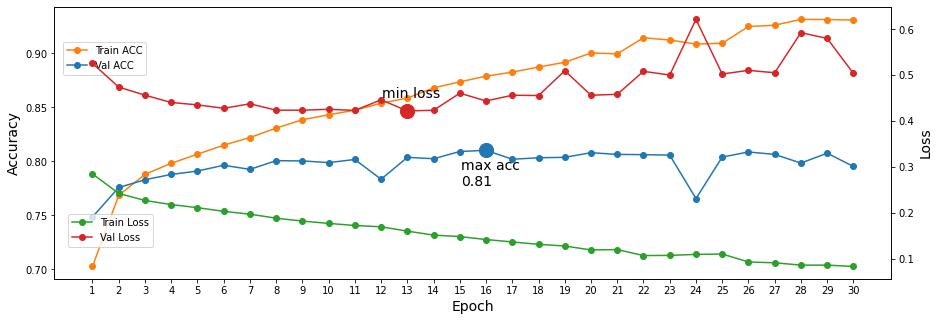

In [ ]:
history = lstm_model.fit(X_train_text, y_train, batch_size=batch_size, epochs=num_epochs, 
                         class_weight=class_weight, validation_data=(X_val_text, y_val), verbose=1)
plot_model_performance(history)

# Evaluasi

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

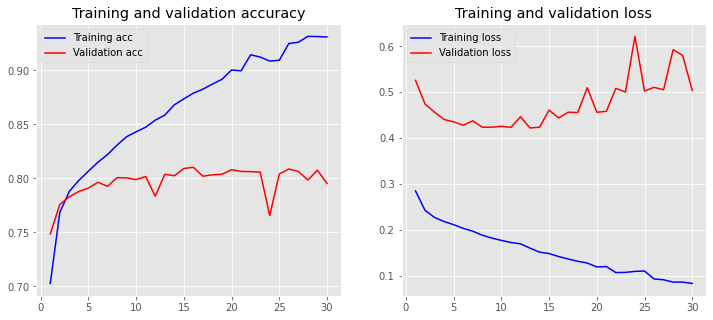

In [ ]:
plot_history(history)

In [ ]:
val = X_val.copy()
val = val[['Tweet']]
val['Type'] = y_val
val['pred'] = (lstm_model.predict(X_val_text)> 0.5)*1 
val['pred'] = val['pred'].apply(lambda x: 1 if x >=0.5 else 0)
error = val[val['Type'] != val['pred']]
error.head()

,Tweet,Type,pred
1655,have trump release his tax first why be he bui...,1,0
932,i dont really know you but your twitter be lig...,1,0
9614,texas democrats to assuage his core audience t...,1,0
8442,angryrefryanztweetztaco tuesday,0,1
11055,stay strong louis tomlinson respect louis,1,0


<Figure size 432x288 with 0 Axes>

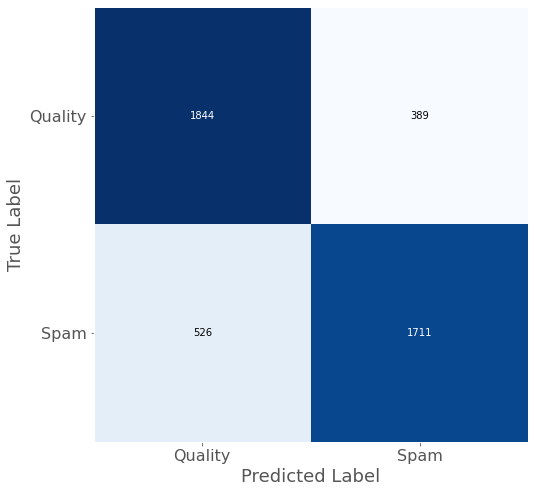

Num False Negatives: 526
Num False Positives: 389


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Plot confusion matrix
cm  = confusion_matrix(val.Type, val.pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
plt.xticks(range(2), ['Quality', 'Spam'], fontsize=16)
plt.yticks(range(2), ['Quality', 'Spam'], fontsize=16)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()

print('Num False Negatives:',sum((val['Type'] == 1) & (val['pred'] == 0)))
print('Num False Positives:',sum((val['Type'] == 0) & (val['pred'] == 1)))

In [ ]:
print("confusion_matrix is")
print(cm)

print(classification_report(val.Type, val.pred))

confusion_matrix is
[[1844  389]
 [ 526 1711]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2233
           1       0.81      0.76      0.79      2237

    accuracy                           0.80      4470
   macro avg       0.80      0.80      0.80      4470
weighted avg       0.80      0.80      0.80      4470



In [ ]:
for t in error[(error['Type'] == 1) & (error['pred'] == 0)]['Tweet'].sample(n=20, random_state=0):
    print(t)

gayle king cory booker get serious httpwww yazmarcom20160517gayle king cory booker get serious pictwittercom3tvpsluo3y
one japanese girl ask me to go with her to see a person a event and my fav game persona its a destiny pictwittercomtidopis4ju
its not hard to come up with good music sometimes i dont be have time to
now you throw it back in my face on purpose
what bank do you go to caitlin captain america
also this the consensus of the evidence suggest racial anxiety drive trump support more than economic anxiety pictwittercomebrhy2ll9c
corporate version of indy kaila
if the federal reserve could bailout wallstreet it can help the 35 million americans in puerto rico
luna love good bind my outfit for the wizarding world of harry potter day one luna pictwittercomestqzu6lkw
the front desk lady be all confuse when i be check in bci have all the im newly pregnant paperwork fill out months ago but im
warren buffett just announce a stake in apple httpslnkdindxgeeyk
how twitter do adtech https

In [ ]:
X_train

,Tweet,char_len,word_len,sent_len,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
6751,sneak preview of my next jazz album this tuema...,142,24,2,0.178571,0.285714,1,0,0,2,2,0
14622,news terrorism incoming un ambassador isis und...,106,20,1,0.136364,0.454545,0,0,1,2,0,0
11381,should have make the 4th option the earth be d...,71,15,1,0.000000,0.000000,0,0,0,0,0,0
9418,liberal boycott versus conservative boycott bo...,95,13,2,0.000000,0.000000,0,0,1,2,0,0
8166,i hate pokemon go because trump make this,38,5,1,0.000000,0.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,video liar jam clapper claim there be no f be ...,92,16,1,0.000000,0.000000,0,0,1,0,0,0
10666,why referral widgets fail to create long term ...,110,15,1,-0.500000,0.300000,0,0,1,1,0,0
13981,the small town of tram berk nestle in the moun...,138,23,2,-0.250000,0.400000,0,0,0,1,1,0
1080,book review sec clintons new book why she lose...,164,35,2,-0.154545,0.684848,0,0,1,1,1,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_split=20, min_samples_leaf=2, n_jobs=-1, random_state=0)
clf.fit(X_train.drop('Tweet',axis=1), y_train.Type.values)
clf_pred = clf.predict_proba(X_val.drop('Tweet',axis=1))

print('Validation Accuracy:', accuracy_score(y_val.Type.values, clf_pred.argmax(axis=-1)))

Validation Accuracy: 0.8313199105145413


In [ ]:
clf_pred.max(axis=-1)

array([0.67958267, 0.60169228, 0.5848908 , ..., 0.93164162, 0.6266634 ,
       0.66075105])

In [ ]:
clf_pred.max(axis=-1)*0.1

array([0.06795827, 0.06016923, 0.05848908, ..., 0.09316416, 0.06266634,
       0.0660751 ])

In [ ]:
score = lstm_model.evaluate(X_val_text, y_val, verbose=1)

140/140 [==============================] - 4s 25ms/step - loss: 0.5040 - acc: 0.7953


In [ ]:
print("Test Loss:", score[0]) 
print("Test Accuracy:", score[1]) 

Test Loss: 0.5039810538291931
Test Accuracy: 0.7953020334243774
